In [9]:
import pandas as pd
import os

file_path_housing = '/Users/manishghoshal/Downloads/DS - Python + SQL + ETL - Healthcare Census (4)/DS - Python + SQL + ETL - Healthcare Census/Data/housing.csv'
housing_df = pd.read_csv(file_path_housing)

file_path_processed_census = '/Users/manishghoshal/Downloads/DS - Python + SQL + ETL - Healthcare Census (4)/DS - Python + SQL + ETL - Healthcare Census/Clean_Data/census.csv'
census_df = pd.read_csv(file_path_processed_census)

merged_df = pd.merge(left= housing_df, right=census_df, how ='left', left_on= 'District Name', right_on= 'District name')

merged_df['Households_Rural'] = merged_df['Total Number of households'] * (merged_df['Rural_Households'] / 100)
merged_df['Households_Urban'] = merged_df['Total Number of households'] * (merged_df['Urban_Households'] / 100)

merged_df['Households_Rural_Livable'] = merged_df['Households_Rural'] * (merged_df['Total Number of Livable'] / 100)
merged_df['Households_Urban_Livable'] = merged_df['Households_Urban'] * (merged_df['Total Number of Livable'] / 100)

merged_df['Households_Rural_Dilapidated'] = merged_df['Households_Rural'] * (merged_df['Total Number of Dilapidated'] / 100)
merged_df['Households_Urban_Dilapidated'] = merged_df['Households_Urban'] * (merged_df['Total Number of Dilapidated'] / 100)

merged_df['Households_Rural_Toilet_Premise'] = merged_df['Households_Rural'] * (merged_df['Latrine_premise'] / 100)
merged_df['Households_Urban_Toilet_Premise'] = merged_df['Households_Urban'] * (merged_df['Latrine_premise'] / 100)



result_df = merged_df[['District Name', 'Rural/Urban', 'Households_Rural', 'Households_Rural_Livable', 'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise',
                        'Households_Urban', 'Households_Urban_Livable', 'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise']]


result_df.columns = ['District', 'Rural/Urban', 'Households_Rural', 'Households_Rural_Livable', 'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise',
                        'Households_Urban', 'Households_Urban_Livable', 'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise']

result_df.to_csv('/Users/manishghoshal/Downloads/DS - Python + SQL + ETL - Healthcare Census (4)/DS - Python + SQL + ETL - Healthcare Census/Clean_Data/housing.csv', index=False)


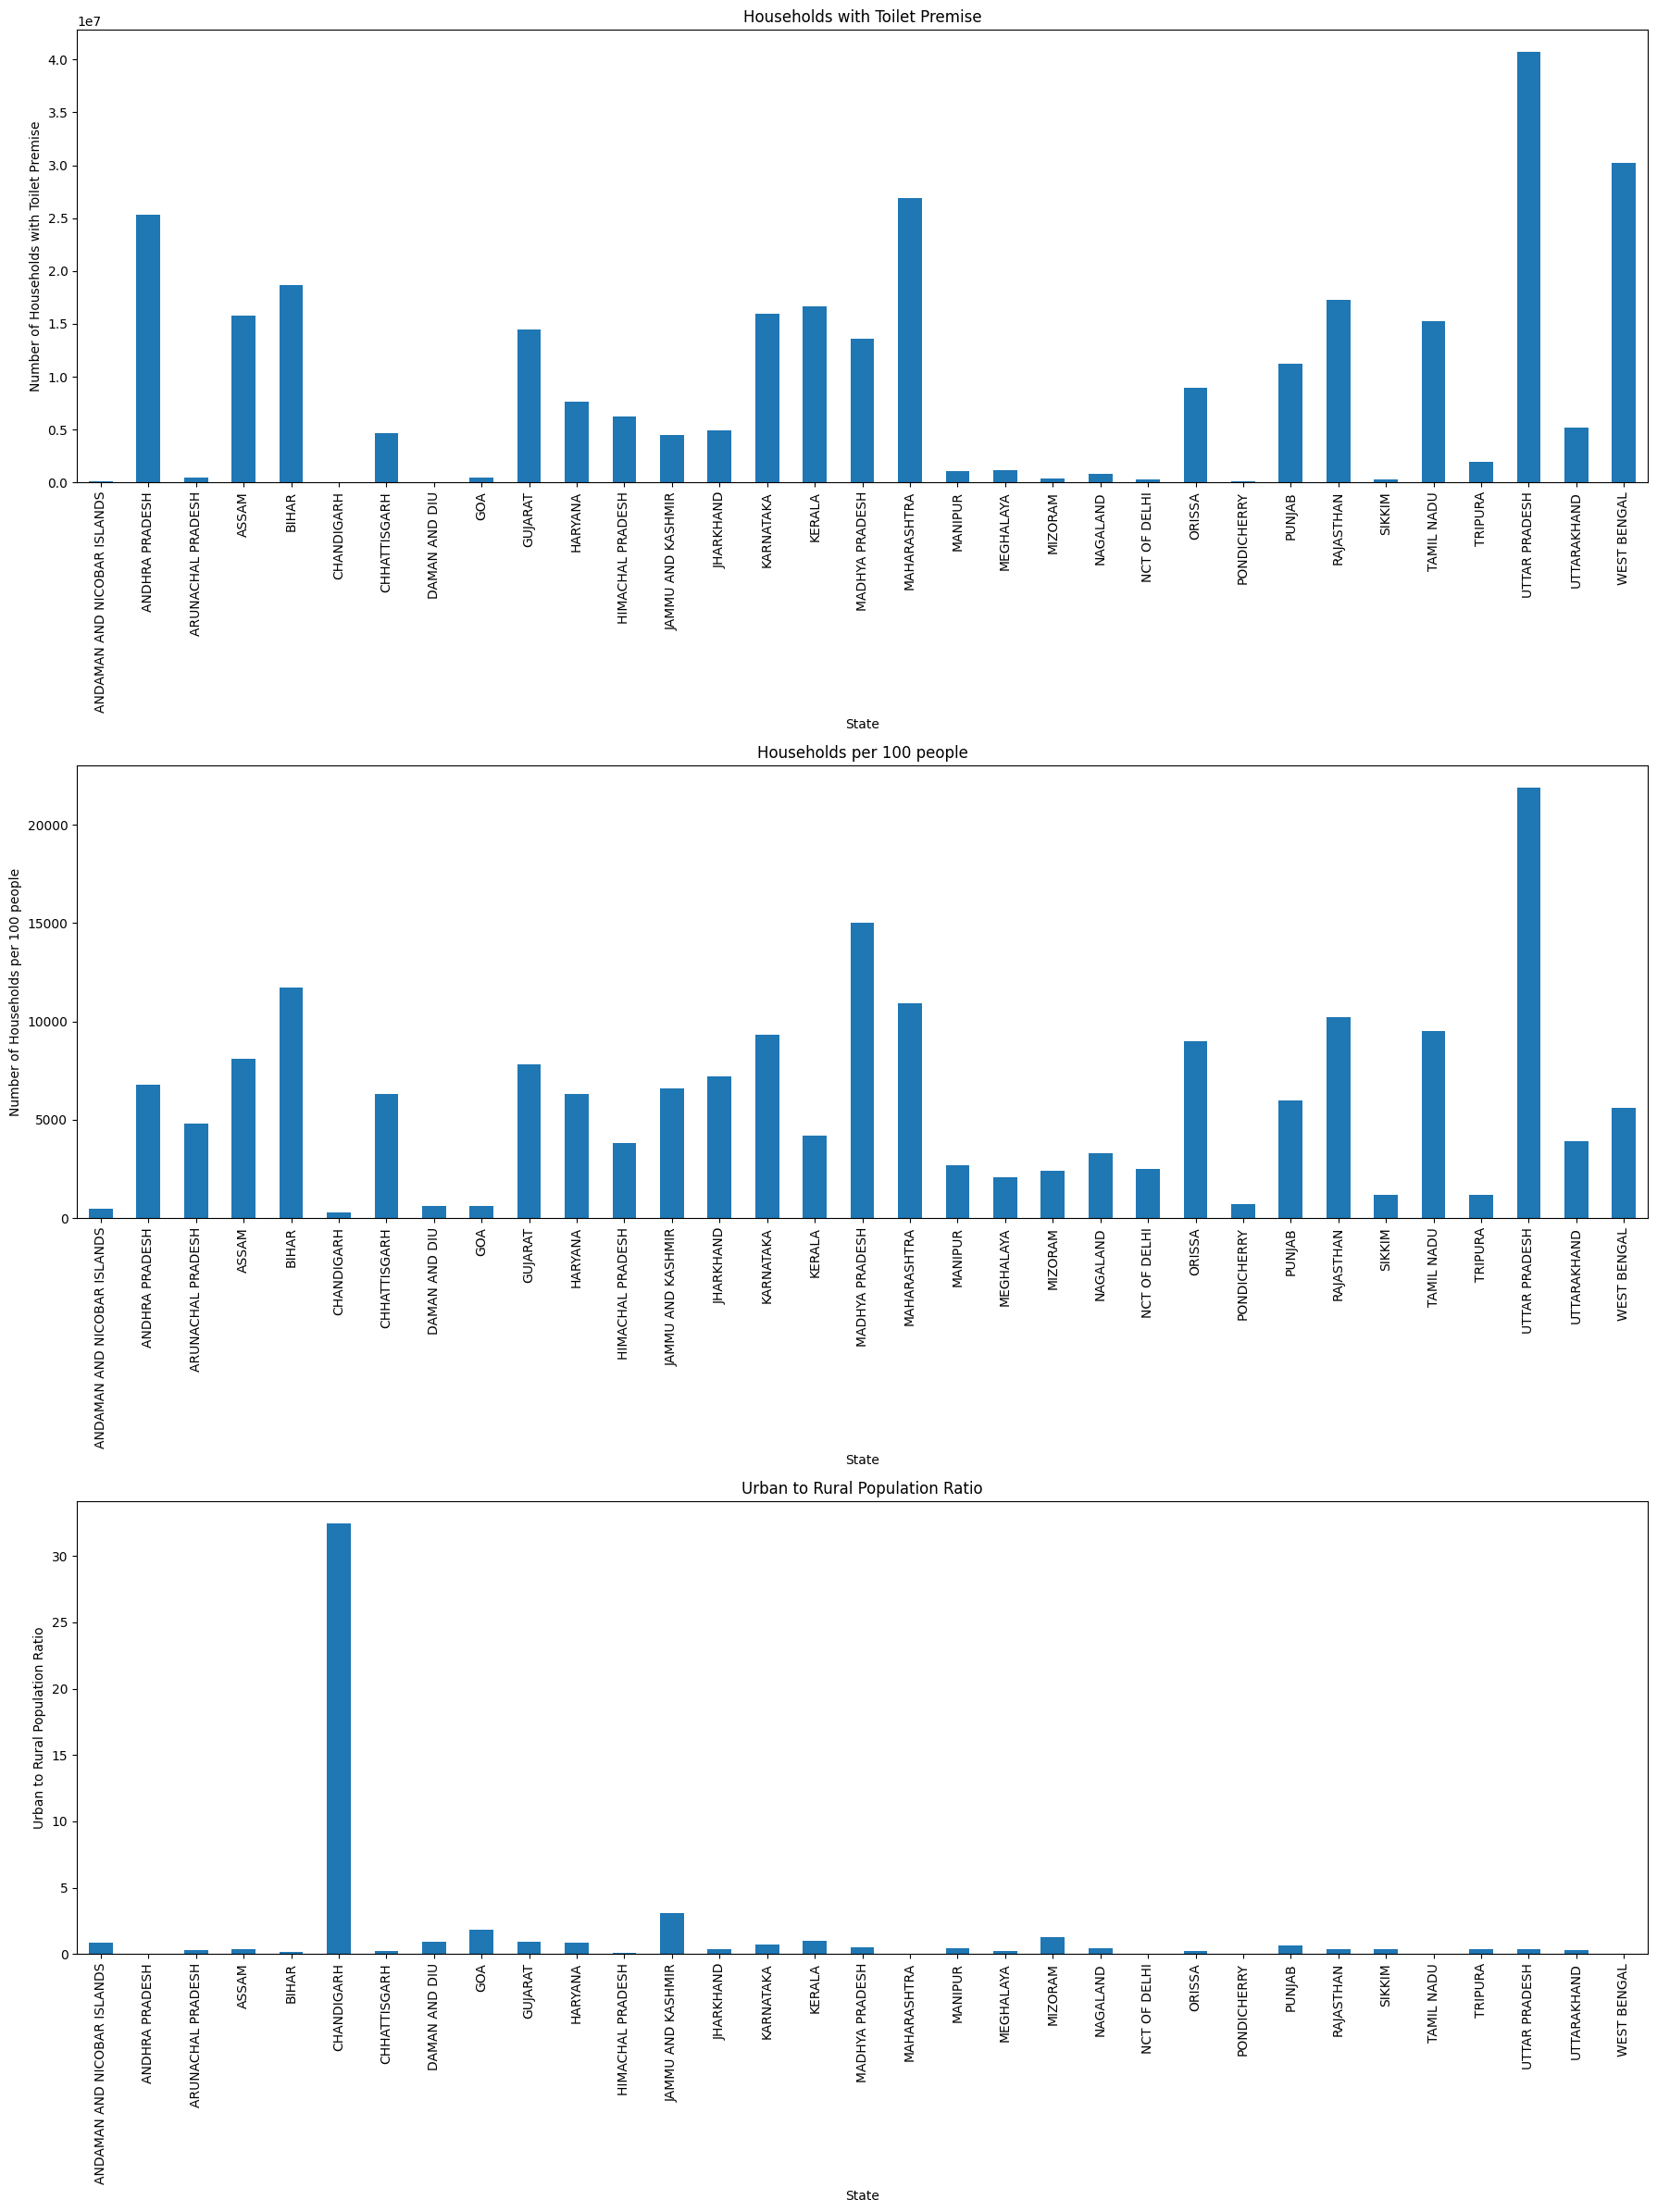

In [10]:
## ----------------------------------------------------------------
#PROBLEM STATEMENT-8 SOLUTION

# Create a figure and axes
fig, axes = plt.subplots(3, 1, figsize=(18, 24))

# Graph 1: Households with Toilet Premise
merged_df.groupby('State name')['Households_Rural_Toilet_Premise'].sum().plot(kind='bar', ax=axes[0], title='Households with Toilet Premise')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Households with Toilet Premise')
axes[0].tick_params(axis='x', rotation=90)

# Graph 2: Households per 100 people
merged_df.groupby('State name')['Total Number of households'].sum().plot(kind='bar', ax=axes[1], title='Households per 100 people')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Number of Households per 100 people')
axes[1].tick_params(axis='x', rotation=90)

# Graph 3: Urban to Rural Population Ratio
merged_df['Urban_to_Rural_Population_Ratio'] = merged_df['Households_Urban'] / merged_df['Households_Rural']
merged_df.groupby('State name')['Urban_to_Rural_Population_Ratio'].mean().plot(kind='bar', ax=axes[2], title='Urban to Rural Population Ratio')
axes[2].set_xlabel('State')
axes[2].set_ylabel('Urban to Rural Population Ratio')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [14]:
## ----------------------------------------------------------------
# PROBLEM STATEMENT-9 SOLUTION CONTINUATION

# Calculate the absolute difference between rural and urban households
merged_df['Households_Rural_Difference'] = merged_df['Households_Rural'] - merged_df['Households_Urban']

# Calculate the percentage difference
merged_df['Percentage_Difference'] = (merged_df['Households_Rural_Difference'] / merged_df['Households_Rural']) * 100

# Identify districts with major differences in rural households
major_difference_districts = merged_df[abs(merged_df['Percentage_Difference']) > 10]

# Print districts with major differences in rural households for each state
for state, state_data in major_difference_districts.groupby('State name'):
    print(f"Districts with major differences in rural households in {state}:")
    for index, row in state_data.iterrows():
        print(f"District: {row['District Name']}, Percentage Difference: {row['Percentage_Difference']:.2f}%")
    print("\n")


Districts with major differences in rural households in ANDAMAN AND NICOBAR ISLANDS:
District: Nicobars, Percentage Difference: 100.00%
District: Nicobars, Percentage Difference: 100.00%
District: South Andaman, Percentage Difference: -45.07%
District: South Andaman, Percentage Difference: -45.07%
District: South Andaman, Percentage Difference: -45.07%


Districts with major differences in rural households in ANDHRA PRADESH:
District: Nizamabad, Percentage Difference: 72.55%
District: Nizamabad, Percentage Difference: 72.55%
District: Nizamabad, Percentage Difference: 72.55%
District: Karimnagar, Percentage Difference: 67.16%
District: Karimnagar, Percentage Difference: 67.16%
District: Karimnagar, Percentage Difference: 67.16%
District: Medak, Percentage Difference: 67.07%
District: Medak, Percentage Difference: 67.07%
District: Medak, Percentage Difference: 67.07%
District: Hyderabad, Percentage Difference: -inf%
District: Hyderabad, Percentage Difference: -inf%
District: Rangareddy,